In [1]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 4.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
#Descargar datasets desde github
!git clone https://github.com/andres-soto-h/monografia-udea-eacd.git

Cloning into 'monografia-udea-eacd'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
#Lectura del dataset transformado
df_propiedades=pd.read_csv('/content/monografia-udea-eacd/df_prop_clean.csv', delimiter=';', encoding='latin1')

In [5]:
df_propiedades.rename(columns={"municipio":"ubicacion"}, inplace=True)

In [6]:
df_propiedades['ubicacion'].value_counts()

rionegro                  1242
el retiro                  406
la ceja                    349
guarne                     205
marinilla                   90
el carmen de viboral        87
llanogrande                 42
san antonio de pereira      40
santuario                   13
la uniÃ³n                    4
Name: ubicacion, dtype: int64

**NOTA:** se decide eliminar la información del municipio de **La Unión**.

In [7]:
mask_union = df_propiedades['ubicacion']!='la uniÃ³n'
df_propiedades = df_propiedades[mask_union]

# **Análisis Descriptivo**

**Dimensión Conjunto de Datos**

In [8]:
df_propiedades.shape

(2474, 190)

**Cantidad de propiedades por municipio**

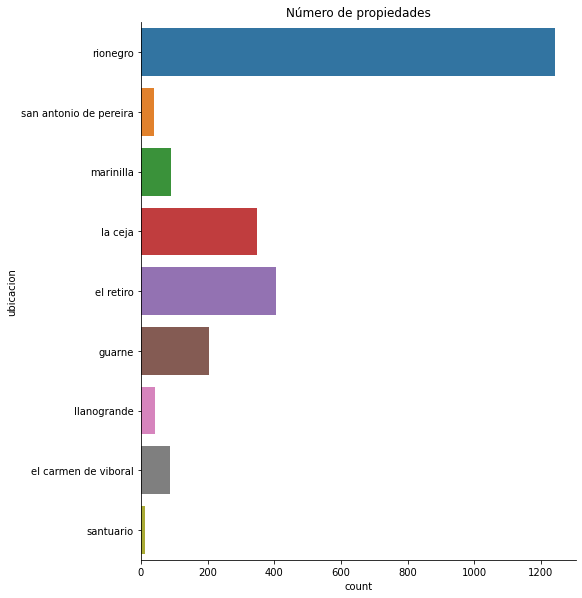

In [9]:
sns.catplot(y="ubicacion", kind="count",  data=df_propiedades, height=8)# , palette="colorblind"
plt.title("Número de propiedades");

**Porcentaje de Población por Tipo de Inmueble**

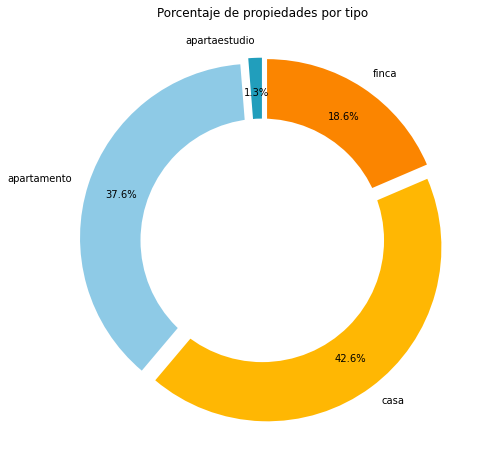

In [10]:
# Pie chart
df_propiedades['inmuebles']=1
data = df_propiedades.groupby("tipo_propiedad")['inmuebles'].sum()
colors = ['#219EBC','#8ECAE6','#FFB703','#FB8500']
explode = (0.05,0.05,0.05,0.05)
 
plt.figure(figsize=(8,8))
plt.pie(list(data), colors = colors, labels=list(data.index), autopct='%1.1f%%', startangle=90, pctdistance=0.8, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# ax1.xaxis.label.set_color('white')
# ax1.axis('equal')  
plt.title("Porcentaje de propiedades por tipo");
plt.show()

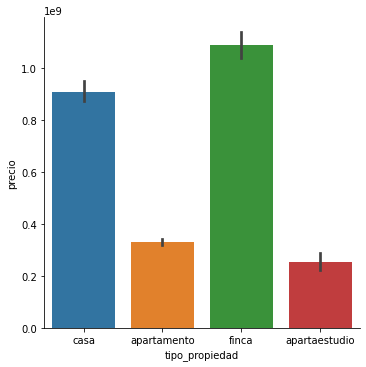

In [11]:
sns.catplot(x = "tipo_propiedad", y = "precio", kind = "bar", data = df_propiedades)

**Estado de la Vivienda**

In [12]:
df_propiedades['tipo'].value_counts()

Usada    2437
Nueva      37
Name: tipo, dtype: int64

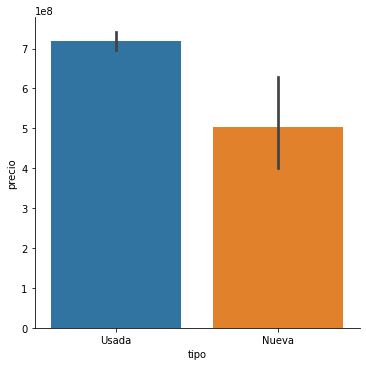

In [13]:
sns.catplot(x = "tipo", y = "precio", kind = "bar", data = df_propiedades)

**Distribución precio de la vivienda**

In [14]:
# plt.title('Distribución Precio de la Vivienda')
# plt.xlabel('Precio (Millones)')
# sns.distplot(df_propiedades['precio']/1000000)

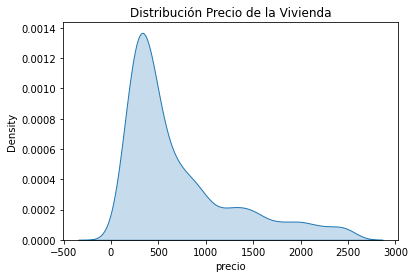

In [15]:
plt.title('Distribución Precio de la Vivienda')
sns.kdeplot(data=df_propiedades['precio']/1000000, shade=True)

In [16]:
print('Información expresada en millones de pesos')
(df_propiedades['precio']/1000000).describe()

Información expresada en millones de pesos


count    2474.000000
mean      715.851693
std       578.395361
min        17.500000
25%       315.000000
50%       470.000000
75%       950.000000
max      2500.000000
Name: precio, dtype: float64

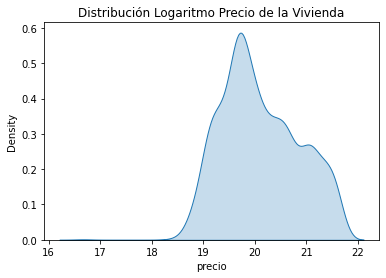

In [17]:
plt.title('Distribución Logaritmo Precio de la Vivienda')
ln_precio = np.log(df_propiedades['precio'])
ln_precio = np.log1p(df_propiedades['precio'])
sns.kdeplot(ln_precio, shade=True)

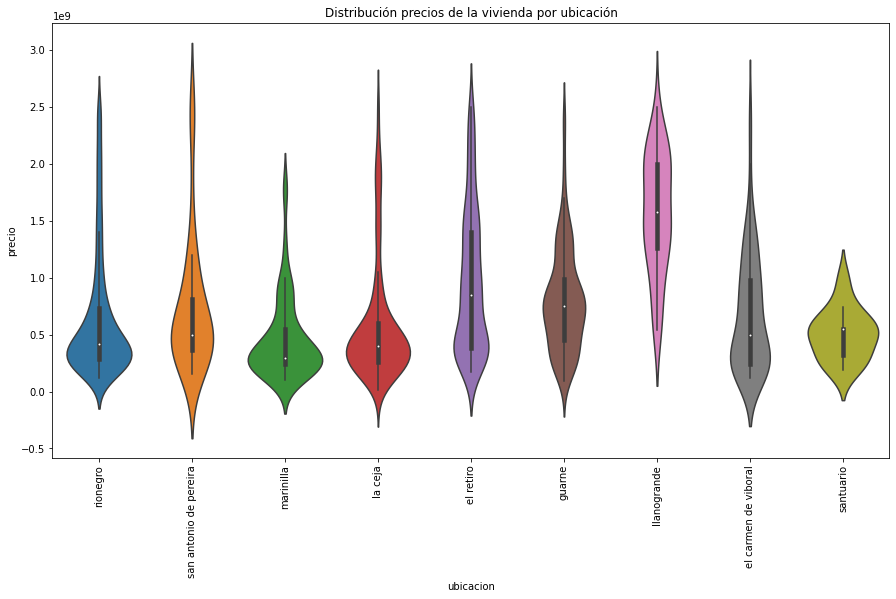

In [18]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df_propiedades, x='ubicacion', y='precio')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Distribución precios de la vivienda por ubicación");

In [19]:
#Precio de la vivienda mediana/promedio por municipio
print('Mediana de los precios de la vivienda por ubicación')
print((df_propiedades.groupby(['tipo_propiedad','ubicacion'])['precio'].quantile()/1000000))
print('**********************************')

Mediana de los precios de la vivienda por ubicación
tipo_propiedad  ubicacion             
apartaestudio   el retiro                  320.000000
                guarne                      95.000000
                la ceja                    180.000000
                rionegro                   261.500000
apartamento     el carmen de viboral       210.000000
                el retiro                  360.000000
                guarne                     220.000000
                la ceja                    229.000000
                llanogrande               1307.904863
                marinilla                  251.000000
                rionegro                   316.343000
                san antonio de pereira     330.000000
                santuario                  320.000000
casa            el carmen de viboral       375.000000
                el retiro                 1175.000000
                guarne                     789.000000
                la ceja                    46

In [20]:
#Precio de la vivienda mediana/promedio por municipio
print('**********************************')
print('Precio promedio de la vivienda por ubicación')
print((df_propiedades.groupby(['tipo_propiedad','ubicacion'])['precio'].mean()/1000000))

**********************************
Precio promedio de la vivienda por ubicación
tipo_propiedad  ubicacion             
apartaestudio   el retiro                  318.000000
                guarne                      95.000000
                la ceja                    184.833333
                rionegro                   266.224139
apartamento     el carmen de viboral       201.361111
                el retiro                  373.741693
                guarne                     255.221250
                la ceja                    237.812727
                llanogrande               1133.904863
                marinilla                  248.519565
                rionegro                   334.557382
                san antonio de pereira     329.100000
                santuario                  320.000000
casa            el carmen de viboral       624.808824
                el retiro                 1270.462255
                guarne                     847.319980
                l

Text(0.5, 1.0, 'Distribución precios de la vivienda por ubicación')

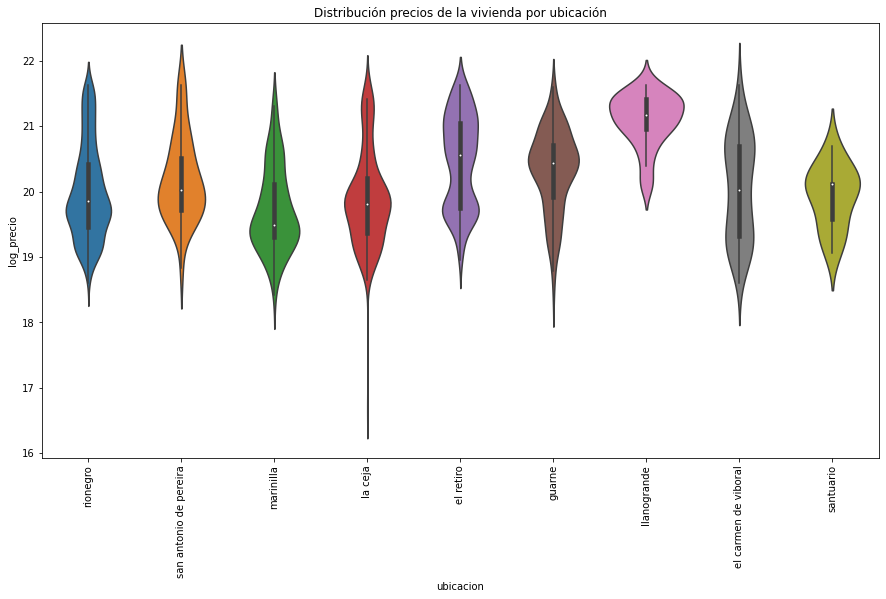

In [21]:
plt.figure(figsize=(15,8))
df_propiedades['log_precio']=ln_precio
sns.violinplot(data=df_propiedades, x='ubicacion', y='log_precio')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Distribución precios de la vivienda por ubicación")

In [22]:
df_propiedades['estrato'] = df_propiedades['estrato'].replace('Campestre', '0')
df_propiedades['estrato'].value_counts()

4    967
3    610
5    608
6    122
0    104
2     59
1      4
Name: estrato, dtype: int64

# **Modelamiento**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,median_absolute_error
from sklearn.model_selection import GridSearchCV

In [24]:
data_model=df_propiedades.copy()
#columnas_quitar=['tipo','url','titulo','descripcion','caractint','caractext','caractsec']
columnas_quitar=['url','titulo','descripcion','caractint','caractext','caractsec']
data_model.drop(columnas_quitar, axis=1, inplace=True)
data_model.shape

(2474, 186)

In [25]:
data_model['ubicacion'].value_counts()

rionegro                  1242
el retiro                  406
la ceja                    349
guarne                     205
marinilla                   90
el carmen de viboral        87
llanogrande                 42
san antonio de pereira      40
santuario                   13
Name: ubicacion, dtype: int64

In [26]:
data_model['estrato'].value_counts()

4    967
3    610
5    608
6    122
0    104
2     59
1      4
Name: estrato, dtype: int64

**División Covariables  y Variable Objetivo**

In [27]:
data_model.columns

Index(['tipo', 'precio', 'area_m2', 'habitaciones', 'banos', 'garajes',
       'balcon', 'bano_de_servicio', 'chimenea', 'cocina_equipada',
       ...
       'ascensor(es)_inteligente(s)', 'lote_vacio', 'control_de_acustica',
       'control_termico', 'panoramica_360o', 'con_cerca_electrica',
       'ubicacion', 'tipo_propiedad', 'inmuebles', 'log_precio'],
      dtype='object', length=186)

In [28]:
data_model['estrato'].astype(int)

0       5
1       0
2       5
3       4
4       0
       ..
2473    3
2474    3
2475    4
2476    3
2477    4
Name: estrato, Length: 2474, dtype: int64

In [29]:
X = data_model.drop(['precio','log_precio','inmuebles'], axis=1)
y = data_model['precio']
y_trans = data_model['log_precio']

In [30]:
X.head()

,tipo,area_m2,habitaciones,banos,garajes,balcon,bano_de_servicio,chimenea,cocina_equipada,cuarto_de_servicio,sauna_turco_jacuzzi,servicio_de_internet,servicios_publicos,zona_de_bbq,acceso_pavimentado,garaje_parqueadero(s),porteria_vigilancia,senderos_ecologicos,area_rural,cerca_de_zona_urbana,sobre_via_secundaria,trans_publico_cercano,estrato,antiguedad,cocina_integral,ventilacion_natural,asador,bosque_nativo,establo,invernadero,pesebrera,terraza,vista_panoramica,seguridad,bano_auxiliar,comedor,estudio,zona_de_lavanderia,gimnasio,piscina,...,finca_agricola,sensor_de_movimiento,planta_electrica,servicios_independientes,cuarto_de_escoltas,salon_de_conferencias,rociadores_de_agua,con_casa_club,disponibilidad_wifi,galpon,piso_de_alta_resistencia,cableado_de_red,puerta_de_seguridad,sala_de_internet,finca_avicola,lote_en_construccion,salon_de_videoconferencias,pasaje_comercial,sistema_de_riego,acceso_para_camiones,con_vivienda,lic_de_construccion,panoramica_un_lado,en_club,auditorio,esquinero,oficinas_administrativas,con_casa_prefabricada,en_zona_comercial,finca_cafetera,servicio_de_lavanderia,altura_restringida,ascensor(es)_inteligente(s),lote_vacio,control_de_acustica,control_termico,panoramica_360o,con_cerca_electrica,ubicacion,tipo_propiedad
0,Usada,320.00,5.0,6.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,1 a 8 aÃ±os,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,casa
1,Nueva,91.97,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,apartamento
2,Usada,150.00,3.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1 a 8 aÃ±os,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,san antonio de pereira,casa
3,Usada,106.00,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1 a 8 aÃ±os,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,casa
4,Nueva,73.37,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,apartamento


**OneHotEncoder Variables Categóricas**

In [31]:
enc = OneHotEncoder(handle_unknown='ignore')
data_aux = pd.DataFrame(enc.fit_transform(X[['tipo','tipo_propiedad','ubicacion','antiguedad']]).toarray(), columns= enc.get_feature_names(['tipo','tipo_propiedad','ubicacion','antiguedad']))
data_aux['fila'] = range(0, X.shape[0])
data_aux.head()

X.drop(['tipo','tipo_propiedad','antiguedad'],axis=1,inplace=True)
X['fila'] = range(0, X.shape[0])
print(X.shape, data_aux.shape)
X = pd.merge(data_aux,X, on = 'fila', how='inner')
X.drop(['fila'], axis=1, inplace=True)
X.shape

(2474, 181) (2474, 22)


(2474, 201)

In [32]:
X.head()

,tipo_Nueva,tipo_Usada,tipo_propiedad_apartaestudio,tipo_propiedad_apartamento,tipo_propiedad_casa,tipo_propiedad_finca,ubicacion_el carmen de viboral,ubicacion_el retiro,ubicacion_guarne,ubicacion_la ceja,ubicacion_llanogrande,ubicacion_marinilla,ubicacion_rionegro,ubicacion_san antonio de pereira,ubicacion_santuario,antiguedad_0,antiguedad_1 a 8 aÃ±os,antiguedad_16 a 30 aÃ±os,antiguedad_9 a 15 aÃ±os,antiguedad_Menos de 1 aÃ±o,antiguedad_MÃ¡s de 30 aÃ±os,area_m2,habitaciones,banos,garajes,balcon,bano_de_servicio,chimenea,cocina_equipada,cuarto_de_servicio,sauna_turco_jacuzzi,servicio_de_internet,servicios_publicos,zona_de_bbq,acceso_pavimentado,garaje_parqueadero(s),porteria_vigilancia,senderos_ecologicos,area_rural,cerca_de_zona_urbana,...,ubicada_en_edificio,finca_agricola,sensor_de_movimiento,planta_electrica,servicios_independientes,cuarto_de_escoltas,salon_de_conferencias,rociadores_de_agua,con_casa_club,disponibilidad_wifi,galpon,piso_de_alta_resistencia,cableado_de_red,puerta_de_seguridad,sala_de_internet,finca_avicola,lote_en_construccion,salon_de_videoconferencias,pasaje_comercial,sistema_de_riego,acceso_para_camiones,con_vivienda,lic_de_construccion,panoramica_un_lado,en_club,auditorio,esquinero,oficinas_administrativas,con_casa_prefabricada,en_zona_comercial,finca_cafetera,servicio_de_lavanderia,altura_restringida,ascensor(es)_inteligente(s),lote_vacio,control_de_acustica,control_termico,panoramica_360o,con_cerca_electrica,ubicacion
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,320.00,5.0,6.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,91.97,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,150.00,3.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,san antonio de pereira
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,106.00,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,73.37,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro


In [33]:
X.shape

(2474, 201)

**División train y Test**

In [34]:
# X = data_model[['tipo', 'area_m2','habitaciones','banos','garajes','estrato','antiguedad','tipo_propiedad','municipio']]
# y = data_model['precio']
# y_trans = np.log1p(data_model['precio'])

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify = X['ubicacion'],  random_state = 42)

ubicacion_train = X_train['ubicacion']
ubicacion_test = X_test['ubicacion']

X_train.drop('ubicacion',axis=1, inplace=True)
X_test.drop('ubicacion',axis=1, inplace=True)

#Variable Objetivo Transformada
y_train_t = np.log1p(y_train)
y_test_t = np.log1p(y_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Preprocesamiento**

In [ ]:
# scaler = StandardScaler()
# data_aux2 = pd.DataFrame(scaler.fit_transform(X_train._get_numeric_data()), columns = list(X_train._get_numeric_data().columns))
# data_aux2.head()

In [ ]:
# train_trans= pd.merge(data_aux2.reset_index(),
#                   data_aux.reset_index(), 
#                   left_index=True, 
#                   right_index=True)
# train_trans.drop(['index_x','index_y'], axis=1, inplace=True )
# train_trans.shape

In [ ]:
# #Transformando los datos de test
# test_aux = pd.DataFrame(enc.transform(X_test[['tipo','tipo_propiedad','municipio','antiguedad','estrato']]).toarray(), columns= enc.get_feature_names(['tipo','tipo_propiedad','municipio','antiguedad','estrato']))
# test_aux2 = pd.DataFrame(scaler.transform(X_test._get_numeric_data()), columns = list(X_test._get_numeric_data().columns))

# test_trans= pd.merge(test_aux2.reset_index(),
#                   test_aux.reset_index(), 
#                   left_index=True, 
#                   right_index=True)
# test_trans.drop(['index_x','index_y'], axis=1, inplace=True )
# test_trans.head()

## **Ajuste del Modelo**

### **Random Forest**

####**Sin transformar la Y**

In [ ]:
pipe = Pipeline(steps = [('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,pipe.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, pipe.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.08460096299584505
The model test MAPE is 0.3018203011132346


In [ ]:
MeAE_train = median_absolute_error(y_train,pipe.predict(X_train))
MeAE_test =  median_absolute_error(y_test, pipe.predict(X_test))
print("The model training MeAE is" , MeAE_train)
print("The model test MeAE is" , MeAE_test)

The model training MeAE is 24735400.0
The model test MeAE is 72790000.0


In [ ]:
r2_train = r2_score(y_train,pipe.predict(X_train))
r2_test = r2_score(y_test, pipe.predict(X_test))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.9690907796695518
The model test R2 is 0.7092142392499245


**Búsqueda de Hiperparámetros**

In [ ]:

# para_grid = {'rf__n_estimators':[10,20,30,40,50], 'rf__max_depth':[5,10,20,25,30], 'rf__min_samples_split':[2,3,5,10,15]}
# para_grid = {'rf__n_estimators':[40,50,60,70], 'rf__max_depth':[25,30,40,50], 'rf__min_samples_split':[2,3,5,10,15],'rf__min_samples_leaf':[1,2,5]}
# para_grid = {'rf__n_estimators':[75, 80, 90], 'rf__max_depth':[15,20,30], 'rf__min_samples_split':[3],'rf__min_samples_leaf':[1,2,5]}
# para_grid = {'rf__n_estimators':[75, 80, 90], 'rf__max_depth':[15,20,30],'rf__min_samples_leaf':[1,2,5]}
para_grid = {'rf__n_estimators':[10,20,30,40,50,80,100,120,180], 'rf__max_depth':[5,10,20,25,30,40], 'rf__min_samples_split':[2,3,5,10,15],'rf__min_samples_leaf':[1,2,5,8]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
stratified = sss.split(X_train, ubicacion_train)
grid = GridSearchCV(pipe, param_grid=para_grid, cv=stratified, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7fa6382605d0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'rf__max_depth': [5, 10, 20, 25, 30, 40],
                         'rf__min_samples_leaf': [1, 2, 5, 8],
                         'rf__min_samples_split': [2, 3, 5, 10, 15],
                         'rf__n_estimators': [10, 20, 30, 40, 50, 80, 100, 120,
                                              180]},
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=25, n_estimators=180,
                                       random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,grid.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, grid.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.08389715176044889
The model test MAPE is 0.29646329498360496


In [ ]:
r2_train = r2_score(y_train,grid.predict(X_train))
r2_test = r2_score(y_test, grid.predict(X_test))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.9699369184555983
The model test R2 is 0.7136602595287439


####**Usando Y transformada**

In [ ]:
pipe.fit(X_train, y_train_t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,np.expm1(pipe.predict(X_train)))
MAPE_test = mean_absolute_percentage_error(y_test, np.expm1(pipe.predict(X_test)))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.0742717378493597
The model test MAPE is 0.2651067181056791


In [ ]:
r2_train = r2_score(y_train,np.expm1(pipe.predict(X_train)))
r2_test = r2_score(y_test, np.expm1(pipe.predict(X_test)))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.9606168316148481
The model test R2 is 0.7007490622496819


**Búsqueda de Hiperparámetros**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# para_grid = {'rf__n_estimators':[10,20,30,40,50], 'rf__max_depth':[5,10,20,25,30], 'rf__min_samples_split':[2,3,5,10,15]}
# para_grid = {'rf__n_estimators':[40,50,60,70], 'rf__max_depth':[25,30,40,50], 'rf__min_samples_split':[2,3,5,10,15]}
# para_grid = {'rf__min_samples_leaf':[2,3,5,10,15]}
# para_grid = {'rf__max_depth':[25,30,40,50], 'rf__min_samples_split':[1,2,3,5,10,15]}
para_grid = {'rf__n_estimators':[10,20,30,40,50,80,95,], 'rf__max_depth':[3,5,10,20,25,30], 'rf__min_samples_split':[3,5,10,15],'rf__min_samples_leaf':[1,2,3,5,10,15]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
# print(sss.get_n_splits(X_train, ubicacion_train))
# stratified = StratifiedShuffleSplit(ubicacion_train, n_split=3, test_size=0.2, random_state=42)
stratified = sss.split(X_train, ubicacion_train)
grid_t= GridSearchCV(pipe, param_grid=para_grid, cv=stratified, scoring='neg_mean_absolute_percentage_error' )
grid_t.fit(X_train, y_train_t)

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7fa63750f8d0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'rf__max_depth': [3, 5, 10, 20, 25, 30],
                         'rf__min_samples_leaf': [1, 2, 3, 5, 10, 15],
                         'rf__min_samples_split': [3, 5, 10, 15],
                         'rf__n_estimators': [10, 20, 30, 40, 50, 80, 95]},
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
grid_t.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=30, min_samples_split=5,
                                       n_estimators=95, random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,np.expm1(grid_t.predict(X_train)))
MAPE_test = mean_absolute_percentage_error(y_test, np.expm1(grid_t.predict(X_test)))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.08677561222510413
The model test MAPE is 0.2685300093166831


In [ ]:
r2_train = r2_score(y_train,np.expm1(grid_t.predict(X_train)))
r2_test = r2_score(y_test, np.expm1(grid_t.predict(X_test)))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.9465227001697657
The model test R2 is 0.7043738564113695


### **Gradient Boosting Regression**

####**Sin tranformar la Y**

In [ ]:
pipe_gbt = Pipeline(steps = [('scaler', StandardScaler()), ('gbt', GradientBoostingRegressor(random_state=42))])

In [ ]:
pipe_gbt.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbt', GradientBoostingRegressor(random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,pipe_gbt.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, pipe_gbt.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.2088553864922366
The model test MAPE is 0.3332732349137268


In [ ]:
r2_train = r2_score(y_train,pipe_gbt.predict(X_train))
r2_test = r2_score(y_test, pipe_gbt.predict(X_test))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.8696324910708
The model test R2 is 0.7218485741772167


**Búsqueda de Hiperparámetros**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# para_grid = {'gbt__n_estimators':[10,20,30], 'gbt__max_depth':[5,10,15], 'gbt__min_samples_split':[2,3,5,10,15], 'gbt__min_samples_leaf':[1,3,5]}
# para_grid = {'gbt__n_estimators':[25,30,40], 'gbt__max_depth':[5,10,15], 'gbt__min_samples_split':[10,15,20], 'gbt__min_samples_leaf':[3,5,8,10]}
# para_grid = {'gbt__n_estimators':[50,60,70,100], 'gbt__max_depth':[8,10,12], 'gbt__min_samples_split':[15], 'gbt__min_samples_leaf':[3,5,8]}
para_grid = {'gbt__n_estimators':[10,20,25,30,40,50,80,100,120,150], 'gbt__max_depth':[5,8,10,12], 'gbt__min_samples_split':[2,3,5,10,15,20,25], 'gbt__min_samples_leaf':[3,5,8,10,12]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
stratified = sss.split(X_train, ubicacion_train)
grid = GridSearchCV(pipe_gbt, param_grid=para_grid, cv=stratified, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7fa63750f950>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gbt',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'gbt__max_depth': [5, 8, 10, 12],
                         'gbt__min_samples_leaf': [3, 5, 8, 10, 12],
                         'gbt__min_samples_split': [2, 3, 5, 10, 15, 20, 25],
                         'gbt__n_estimators': [10, 20, 25, 30, 40, 50, 80, 100,
                                               120, 150]},
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbt',
                 GradientBoostingRegressor(max_depth=8, min_samples_leaf=3,
                                           min_samples_split=10,
                                           n_estimators=150,
                                           random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,grid.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, grid.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.053137193638456856
The model test MAPE is 0.2934994351483371


In [ ]:
r2_train = r2_score(y_train,grid.predict(X_train))
r2_test = r2_score(y_test, grid.predict(X_test))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.9953912437656199
The model test R2 is 0.7314575349516494


####**Usando Y transformada**

In [ ]:
pipe_gbt.fit(X_train, y_train_t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbt', GradientBoostingRegressor(random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,np.expm1(pipe.predict(X_train)))
MAPE_test = mean_absolute_percentage_error(y_test, np.expm1(pipe.predict(X_test)))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

The model training MAPE is 0.0742717378493597
The model test MAPE is 0.2651067181056791


In [ ]:
r2_train = r2_score(y_train,np.expm1(pipe.predict(X_train)))
r2_test = r2_score(y_test, np.expm1(pipe.predict(X_test)))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training R2 is 0.9606168316148481
The model test R2 is 0.7007490622496819


**Búsqueda de hiperparámetros**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# para_grid = {'gbt__n_estimators':[10,20,30], 'gbt__max_depth':[5,10,15], 'gbt__min_samples_split':[2,3,5,10,15], 'gbt__min_samples_leaf':[1,3,5]}
# para_grid = {'gbt__n_estimators':[20,30,40], 'gbt__max_depth':[5,10,15], 'gbt__min_samples_split':[5,10,15,17], 'gbt__min_samples_leaf':[1,3,5]}
# para_grid = {'gbt__n_estimators':[40,50,60], 'gbt__min_samples_split':[17,20,25]}
para_grid = {'gbt__n_estimators':[10,20,30,40,50,60,70,90,100], 'gbt__max_depth':[5,10,12,15,20,25], 'gbt__min_samples_split':[5,10,15,17,25,30,40], 'gbt__min_samples_leaf':[1,3,5]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# stratified = sss.get_n_splits(X_train, ubicacion_train)
stratified = sss.split(X_train, ubicacion_train)
grid_t= GridSearchCV(pipe_gbt, param_grid=para_grid, cv=stratified, scoring='neg_mean_absolute_percentage_error' )
grid_t.fit(X_train, y_train_t)

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7fa63750fcd0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gbt',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'gbt__max_depth': [5, 10, 12, 15, 20, 25],
                         'gbt__min_samples_leaf': [1, 3, 5],
                         'gbt__min_samples_split': [5, 10, 15, 17, 25, 30, 40],
                         'gbt__n_estimators': [10, 20, 30, 40, 50, 60, 70, 90,
                                               100]},
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
grid_t.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbt',
                 GradientBoostingRegressor(max_depth=5, min_samples_leaf=5,
                                           min_samples_split=15,
                                           random_state=42))])

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,np.expm1(grid_t.predict(X_train)))
MAPE_test = mean_absolute_percentage_error(y_test, np.expm1(grid_t.predict(X_test)))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

NameError: ignored

In [ ]:
r2_train = r2_score(y_train,np.expm1(grid_t.predict(X_train)))
r2_test = r2_score(y_test, np.expm1(grid_t.predict(X_test)))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

### **Red Neuronal**

####**Sin tranformar la Y**

In [ ]:
from sklearn.neural_network import MLPRegressor
pipe_rnn = Pipeline(steps = [('scaler', StandardScaler()), ('rnn', MLPRegressor(activation='relu',learning_rate_init=0.001,max_iter=100, solver='lbfgs',random_state=42))])

In [ ]:
pipe_rnn.fit(X_train, y_train)

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,pipe_rnn.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, pipe_rnn.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

In [ ]:
r2_train = r2_score(y_train,pipe_rnn.predict(X_train))
r2_test = r2_score(y_test, pipe_rnn.predict(X_test))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

**Búsqueda de hiperparámetros**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# para_grid = {'rnn__hidden_layer_sizes':[(80,40),(90,40),(95,45),(100,50)]}
# para_grid = {'rnn__hidden_layer_sizes':[(100,50),(180,90),(200,100)], 'rnn__alpha':[0.01,0.1,0.15,0.2]}
para_grid = {'rnn__hidden_layer_sizes':[(80,40),(90,40),(95,45),(100,50),(180,90),(200,100)], 'rnn__max_iter':[10,15,30,50,80],'rnn__alpha':[0.01,0.1,0.15,0.2]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
stratified = sss.split(X_train, ubicacion_train)
grid = GridSearchCV(pipe_rnn, param_grid=para_grid, cv=stratified, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train,grid.predict(X_train))
MAPE_test = mean_absolute_percentage_error(y_test, grid.predict(X_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

In [ ]:
r2_train = r2_score(y_train,grid.predict(X_train))
r2_test = r2_score(y_test, grid.predict(X_test))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

Referencia: https://www.cienciadedatos.net/documentos/py35-redes-neuronales-python.html

### **XGBoost**

####**Transformando la Y**

In [ ]:
#!pip install xgboost

In [35]:
import xgboost as xgb

In [36]:
pipe_xgb = Pipeline(steps = [
    ('scaler', StandardScaler()), 
    ('xgb',  xgb.XGBRegressor(
        objective='reg:squarederror', reg_lambda=4, max_depth=4, learning_rate=0.2, n_jobs=-1
    ))
])


pipe_xgb.fit(X_train, y_train_t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(learning_rate=0.2, max_depth=4, n_jobs=-1,
                              objective='reg:squarederror', reg_lambda=4))])

In [37]:
MAPE_train = mean_absolute_percentage_error(y_train,np.expm1(pipe_xgb.predict(X_train)))
MAPE_test = mean_absolute_percentage_error(y_test, np.expm1(pipe_xgb.predict(X_test)))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

print('---------------------')

r2_train = r2_score(y_train,np.expm1(pipe_xgb.predict(X_train)))
r2_test = r2_score(y_test, np.expm1(pipe_xgb.predict(X_test)))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training MAPE is 0.14384346751970462
The model test MAPE is 0.28241201183764464
---------------------
The model training R2 is 0.899679893581149
The model test R2 is 0.7521811629457192


In [40]:

pipe_xgb2 = Pipeline(steps = [
    ('scaler', StandardScaler()), 
    ('xgb',  xgb.XGBRegressor(
        objective='reg:squarederror'
    ))
])

para_grid_xgb = {'xgb__n_estimators':[100,110,120,130,140,150], 'xgb__max_depth':[3,4,5,6,7,8,9], 'xgb__learning_rate':[0.1,0.3,0.5], 'xgb__reg_lambda':[0.5, 1.0, 1.5, 2.0] }

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
stratified = sss.split(X_train, ubicacion_train)

grid_xgb= GridSearchCV(pipe_xgb2, param_grid=para_grid_xgb, cv=stratified, scoring='neg_mean_absolute_percentage_error', n_jobs=10, verbose=10 )
grid_xgb.fit(X_train, y_train_t)


Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7fd4a80ecdd0>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(objective='reg:squarederror'))]),
             n_jobs=10,
             param_grid={'xgb__learning_rate': [0.1, 0.3, 0.5],
                         'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'xgb__n_estimators': [100, 110, 120, 130, 140, 150],
                         'xgb__reg_lambda': [0.5, 1.0, 1.5, 2.0]},
             scoring='neg_mean_absolute_percentage_error', verbose=10)

In [41]:
grid_xgb.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(max_depth=9, n_estimators=150,
                              objective='reg:squarederror', reg_lambda=1.0))])

In [42]:

MAPE_train = mean_absolute_percentage_error(y_train,np.expm1(grid_xgb.predict(X_train)))
MAPE_test = mean_absolute_percentage_error(y_test, np.expm1(grid_xgb.predict(X_test)))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

print('---------------------')

r2_train = r2_score(y_train,np.expm1(grid_xgb.predict(X_train)))
r2_test = r2_score(y_test, np.expm1(grid_xgb.predict(X_test)))
print("The model training R2 is" , r2_train)
print("The model test R2 is" , r2_test)

The model training MAPE is 0.03816326005069461
The model test MAPE is 0.29211878160941895
---------------------
The model training R2 is 0.9917959611827777
The model test R2 is 0.7457443538516131
